In [17]:
#Classification
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
import matplotlib.pyplot
import torch
import torch.nn as nn
import torch.nn.functional as F 
from sklearn.cluster import KMeans
import numpy as np
from sklearn.utils import shuffle
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
def paint_dataset():
    sample_dataset=plt.imread("C:\\Users\\TALYXD\\Desktop\\Sample Dataset 6.jpg")
    sample_dataset=sample_dataset.astype(float)
    index2=sample_dataset[:,:,2]-sample_dataset[:,:,0]
    ##Purple
    n1=np.where(index2>(50))
    y1=np.zeros((n1[0].shape[0],1))
    ##Yellow
    n0=np.where(index2<-50)
    y2=np.ones((n0[0].shape[0],1))
    #Combine the data to create X data and prediction Y
    Y=np.concatenate((y1,y2)).reshape(n1[0].shape[0]+n0[0].shape[0],1)
    n1=np.stack((n1[1],n1[0]))
    n0=np.stack((n0[1],n0[0]))
    X=np.hstack((n1,n0))
    #Shuffling dataset 
    X_Train, X_Test, Y_Train, Y_Test  = train_test_split(X.transpose(), Y, test_size=0.33, random_state=42)
    #Return 1000 dataset for training and 500 for testing
    return(X_Train[0:1000,:], Y_Train[0:1000,:], X_Test[0:500,:], Y_Test[0:500,:])


class RBF:
    #Initialization 
    def __init__(self,lr,epoch,n_centers):
        self.lr=lr
        self.epoch=epoch
        self.n_centers=n_centers
        self.RandomState=np.random.seed(61000)
        w=np.random.normal(0,10,(n_centers,1))
        self.weight=torch.tensor(w,requires_grad=True)
    #Setting the center with k means clustering
    def set_center(self,X):
        kmeans = KMeans(n_clusters=self.n_centers, random_state=0).fit(X)
        self.Center=kmeans.cluster_centers_
        self.Output=kmeans.predict(X)
        return(self.Center,self.Output)
    #Calculate the sigma for the radial basis function
    def calculate_sigma(self,X):
        dmax=0
        for i in range(self.n_centers):
            for j in range(self.n_centers):
                d=LA.norm(self.Center[i]-self.Center[j])
                dmax=max(d,dmax)
        self.sigma=dmax/np.sqrt(2*self.n_centers)
        return(self.sigma)
    #Forward Propagation
    def forward(self,X):
        phi_all=np.array([])
        for i in range(self.n_centers):
            phi=np.exp((-1/(2*self.sigma*self.sigma))*np.power(LA.norm(X-self.Center[i],axis=1),2))
            phi=phi.reshape(-1,1)
            if i==0:
                phi_all=phi
            else:
                phi_all=np.hstack((phi_all,phi))
        
        self.phi_all=torch.tensor(phi_all)
        ##Classification
        predict=torch.matmul(self.phi_all,self.weight)
        predict=torch.sigmoid(predict)
        return(predict)
    #Back Propagation
    def backward(self,X,Y):
        LOSS=[]
        for i in range(self.epoch):
            if i%500==0:
                print('epoch: '+str(i))
            predict=self.forward(X)
            #Classification
            criteria=nn.BCELoss()
            Y=torch.tensor(Y, dtype=torch.float64)
            Y=Y.view(-1)
            predict=predict.view(-1)
            loss=criteria(predict,Y)
            loss.backward(retain_graph=True)
            self.weight.data=self.weight.data-self.lr*self.weight.grad.data
            self.weight.grad.data.zero_()
            LOSS.append(loss.detach().numpy())
        return(LOSS)    
    


Number of centers: 1 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.438
Number of centers: 2 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.764
Number of centers: 4 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.712
Number of centers: 8 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.678
Number of centers: 16 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.748
Number of centers: 32 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.762
Number of centers: 64 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.924


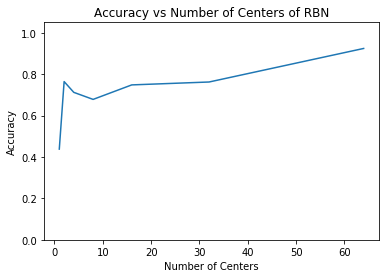

Number of centers: 1 and learning rate: 0.5
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.438
Number of centers: 2 and learning rate: 0.5
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.764
Number of centers: 4 and learning rate: 0.5
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.778
Number of centers: 8 and learning rate: 0.5
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.758
Number of centers: 16 and learning rate: 0.5
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.888
Number of centers: 32 and learning rate: 0.5
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.984
Number of centers: 64 and learning rate: 0.5
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
1.0


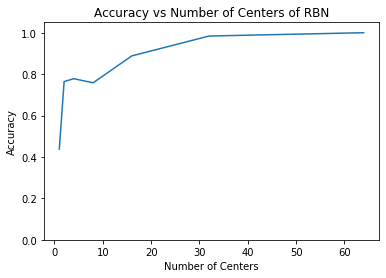

Number of centers: 1 and learning rate: 1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.438
Number of centers: 2 and learning rate: 1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.764
Number of centers: 4 and learning rate: 1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.778
Number of centers: 8 and learning rate: 1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.764
Number of centers: 16 and learning rate: 1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
0.92
Number of centers: 32 and learning rate: 1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
1.0
Number of centers: 64 and learning rate: 1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
1.0


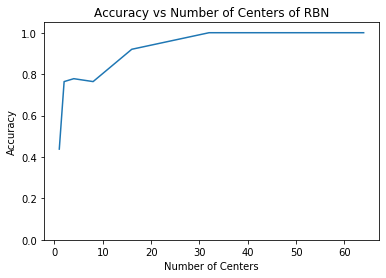

In [15]:
#Loading Data Classification
X_Train, Y_Train, X_Test, Y_Test=paint_dataset()
#Classification 
#Varying Learning Rate
learning_rate=[0.1,0.5,1]
for j in learning_rate:
    epoch=3000
    n_centers_all=[1,2,4,8,16,32,64]
    Accuracy_testing=[]
    for n_centers in n_centers_all:
        print('Number of centers: '+str(n_centers)+' and learning rate: '+str(j))
        Model=RBF(j,epoch,n_centers)
        Center,Output=Model.set_center(X_Train)
        sigma=Model.calculate_sigma(X_Train)
        LOSS=Model.backward(X_Train,Y_Train)
        predict=Model.forward(X_Train)
        predict2=Model.forward(X_Test)
        predict2=predict2.detach().numpy()
        predict2=predict2.reshape(-1)
        Y_Test=Y_Test.reshape(-1)
        acc_test=np.sum((Y_Test==(predict2>0.5)*1)*1)/(Y_Test.shape[0])
        print(acc_test)
        Accuracy_testing.append(acc_test)
        
    plt.figure(1)
    plt.plot(n_centers_all,Accuracy_testing)
    plt.xlabel('Number of Centers')
    plt.ylabel('Accuracy') 
    plt.title('Accuracy vs Number of Centers of RBN')
    plt.ylim([0,1.05])
    plt.show()

epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


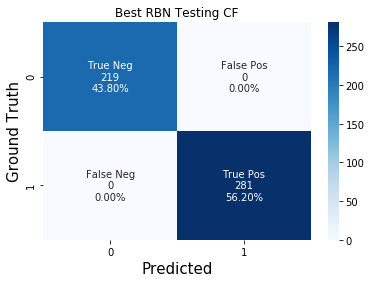

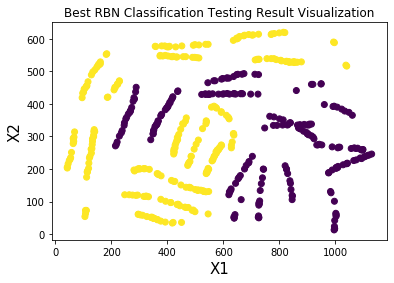

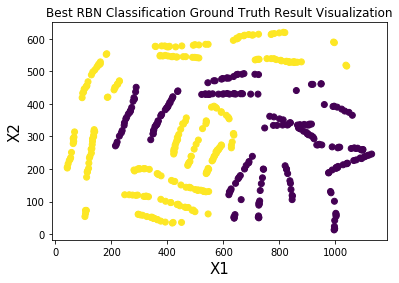

In [19]:
#Best Result 
X_Train, Y_Train, X_Test, Y_Test=paint_dataset()
#Parameter Settings
lr=1
epoch=3000
n_centers=32
#Initialization of the model
Model=RBF(lr,epoch,n_centers)
#Setting the Centers
Center,Output=Model.set_center(X_Train)
#Calculate the sigma
sigma=Model.calculate_sigma(X_Train)
#Back Propagation
LOSS=Model.backward(X_Train,Y_Train)
#Predicting the test dataset
predict2=Model.forward(X_Test)

predicttest=((predict2>0.5)*1).reshape(-1)

Y_Test2=Y_Test.reshape(-1)

##Generating Testing Confusion Matrix
testcm=confusion_matrix(Y_Test2,predicttest)
##Visualization of test confusion matrix
plt.figure(1)
plt.title('Best RBN Testing CF')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                testcm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     testcm.flatten()/np.sum(testcm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(testcm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Ground Truth', fontsize = 15) # y-axis label with fontsize 15
plt.show()

#Visualizing the testing prediction result
predict2=predict2.reshape(Y_Test.shape[0])
plt.figure(4)
plt.title('Best RBN Classification Testing Result Visualization')
plt.scatter(X_Test[:,0],X_Test[:,1],c=(predict2>0.5))
plt.xlabel('X1', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('X2', fontsize = 15) # y-axis label with fontsize 15
plt.show()
#Visualizing the testing ground truth
Y_Test=Y_Test.reshape(Y_Test.shape[0])
plt.figure(5)
plt.title('Best RBN Classification Ground Truth Result Visualization')
plt.scatter(X_Test[:,0],X_Test[:,1],c=(Y_Test>0.5))
plt.xlabel('X1', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('X2', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [23]:
#Regression
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
import matplotlib.pyplot
import torch
import torch.nn as nn
import torch.nn.functional as F 
from sklearn.cluster import KMeans
import numpy as np
from sklearn.utils import shuffle
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import r2_score
#Simulating the regression dataset 
def simulated_regression_data():
    X = np.linspace(-10, 10, num=1500)
    Y = 0.1*X*np.cos(X) + 0.1*np.random.normal(size=1500)
    X, Y = shuffle(X,Y)
    X_Train=X[0:1000]
    X_Test=X[1000:1500]
    Y_Train=Y[0:1000]
    Y_Test=Y[1000:1500]
    return X_Train.reshape(-1,1), Y_Train.reshape(-1,1), X_Test.reshape(-1,1), Y_Test.reshape(-1,1)

class RBF:
    #Initializing the Model:Parameter and weights
    def __init__(self,lr,epoch,n_centers):
        self.lr=lr
        self.epoch=epoch
        self.n_centers=n_centers
        self.RandomState=np.random.seed(61000)
        w=np.random.normal(0,10,(n_centers,1))
        self.weight=torch.tensor(w,requires_grad=True)
    #Setting the center with k means clustering   
    def set_center(self,X):
        kmeans = KMeans(n_clusters=self.n_centers, random_state=0).fit(X)
        self.Center=kmeans.cluster_centers_
        self.Output=kmeans.predict(X)
        return(self.Center,self.Output)
    #Calculate sigma for the radial basis function
    def calculate_sigma(self,X):
        dmax=0
        for i in range(self.n_centers):
            for j in range(self.n_centers):
                d=LA.norm(self.Center[i]-self.Center[j])
                dmax=max(d,dmax)
        self.sigma=dmax/np.sqrt(2*self.n_centers)
        return(self.sigma)
    #Forward Propagation: Regression
    def forward(self,X):
        phi_all=np.array([])
        for i in range(self.n_centers):
            phi=np.exp((-1/(2*self.sigma*self.sigma))*np.power(LA.norm(X-self.Center[i],axis=1),2))
            phi=phi.reshape(-1,1)
            if i==0:
                phi_all=phi
            else:
                phi_all=np.hstack((phi_all,phi))
        
        self.phi_all=torch.tensor(phi_all)
        #Regression
        predict=torch.matmul(self.phi_all,self.weight)
        return(predict)
    #Back Propagation
    def backward(self,X,Y):
        LOSS=[]
        for i in range(self.epoch):
            if i%500==0:
                print('epoch: '+str(i))
            predict=self.forward(X)
            #Regression
            criteria=nn.MSELoss()
            Y=torch.tensor(Y, dtype=torch.float64)
            Y=Y.view(-1)
            predict=predict.view(-1)
            loss=criteria(predict,Y)
            loss.backward(retain_graph=True)
            self.weight.data=self.weight.data-self.lr*self.weight.grad.data
            self.weight.grad.data.zero_()
            LOSS.append(loss.detach().numpy())
        return(LOSS)    
    


Number of centers: 1 and learning rate: 0.05
epoch: 0
epoch: 500


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 2 and learning rate: 0.05
epoch: 0
epoch: 500


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 4 and learning rate: 0.05
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 8 and learning rate: 0.05
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 16 and learning rate: 0.05
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 32 and learning rate: 0.05
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 64 and learning rate: 0.05
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


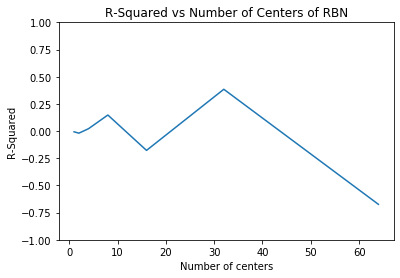

Number of centers: 1 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 2 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 4 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 8 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 16 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 32 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 64 and learning rate: 0.1
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


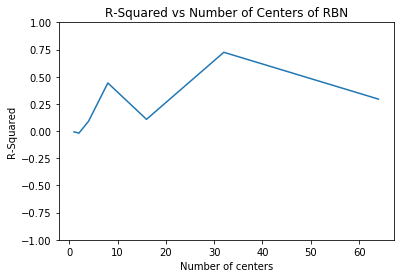

Number of centers: 1 and learning rate: 0.3
epoch: 0
epoch: 500

C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 2 and learning rate: 0.3
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 4 and learning rate: 0.3
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 8 and learning rate: 0.3
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 16 and learning rate: 0.3
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 32 and learning rate: 0.3
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
Number of centers: 64 and learning rate: 0.3
epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


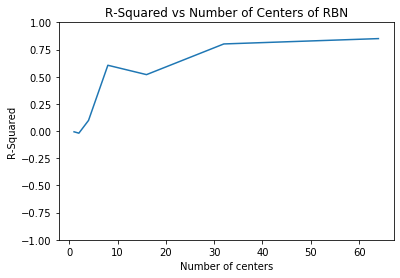

In [28]:
# Loading Regression Data
X_Train, Y_Train, X_Test, Y_Test=simulated_regression_data()
#Parameters
epoch=3000
n_centers_all=[1,2,4,8,16,32,64]
learning_rate=[0.05,0.1,0.3]
for j in learning_rate:
    R_SQUARE=[]
    for n_centers in n_centers_all:
        print('Number of centers: '+str(n_centers)+' and learning rate: '+str(j))
        #Initialization of the Model
        Model=RBF(j,epoch,n_centers)
        #Setting the Center with k means clustering
        Center,Output=Model.set_center(X_Train)
        #Calculate the sigma
        sigma=Model.calculate_sigma(X_Train)
        #Back Propagation
        LOSS=Model.backward(X_Train,Y_Train)
        #Predicting the test dataset
        predict2=Model.forward(X_Test)
        #Changing torch tensor to numpy
        predict2=predict2.detach().numpy()
        #Calculate R-Squared 
        R_SQUARE.append(r2_score(Y_Test,predict2))
        
    #Visualizing the number of center vs the R-Squared result
    plt.figure(1)
    ax = plt.gca()
    plt.plot(n_centers_all,R_SQUARE)
    ax.set_ylim([-1, 1])
    plt.xlabel('Number of centers')
    plt.ylabel('R-Squared')
    plt.title('R-Squared vs Number of Centers of RBN')
    plt.show()


epoch: 0


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


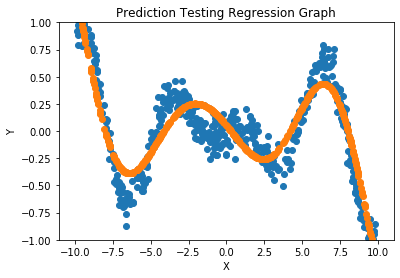

In [29]:
#Training Best Result Regression
#Loading the simulated data
X_Train, Y_Train, X_Test, Y_Test=simulated_regression_data()
#Initialize parameter
lr=0.3
epoch=3000
n_centers=16
#Initialize the Model
Model=RBF(lr,epoch,n_centers)
#Setting the center with k means clustering
Center,Output=Model.set_center(X_Train)
#Calculate the sigma 
sigma=Model.calculate_sigma(X_Train)
#Back Propagation
LOSS=Model.backward(X_Train,Y_Train)
#Predicting the testing dataset
predict2=Model.forward(X_Test)

#######################################
##Prediction TestingRegression graph 
plt.figure(2)
plt.scatter(X_Test,Y_Test)
plt.scatter(X_Test,predict2.detach().numpy())
ax = plt.gca()
ax.set_ylim([-1, 1])
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Prediction Testing Regression Graph')
plt.show()
#####################################333